# IMPORT

In [3]:
# Library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# review dataset
df = pd.read_csv('Circle K customer behavior - edited-2.csv')
df.head()

,Time,Gender,Age Group,Address,Frequently,How did you know about Circle K?,Occupation,Average Monthly Income,Estimated Monthly Spend,Typically Purchase,...,Good Service,Good Security,Space,Good Incentives,Customer Care,Handles Complaints Well,Staff Attitude,Purchasing Experience Factors,Feedback,Recommend
0,22/04/2024 23:45,Female,18-24,Ba Dinh,Less than once a month,Friends,Student,"Under 5,000,000 VND","Under 500,000 VND","Drinks, Snack Foods, Prepared Foods",...,Satisfied,Neutral,Neutral,Dissatisfied,Satisfied,Neutral,Satisfied,Satisfied,No,Definitely
1,22/04/2024 23:45,Female,Under 18,Cau Giay,Monthly,"Relatives, Friends, Internet, TV, Social Media...",Student,"Under 5,000,000 VND","Under 500,000 VND","Drinks, Grocery Items, Snack Foods",...,Satisfied,Neutral,Neutral,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,No,Maybe
2,22/04/2024 23:47,Female,18-24,Bac Tu Liem,Monthly,Saw it by chance,Student,"From 5,000,000 to 10,000,000 VND","Under 500,000 VND",Drinks,...,Neutral,Neutral,Satisfied,Satisfied,Satisfied,Neutral,Neutral,Neutral,Improve cleaning services,Maybe
3,23/04/2024 11:22,Female,18-24,Hoan Kiem,Weekly,Saw it by chance,Student,"From 5,000,000 to 10,000,000 VND","Under 500,000 VND","Drinks, Grocery Items, Snack Foods, Prepared F...",...,Satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Satisfied,Very satisfied,Satisfied,No,Definitely
4,23/04/2024 11:26,Male,18-24,Ba Dinh,Weekly,"Friends, Saw it by chance",Student,"Under 5,000,000 VND","Under 500,000 VND","Drinks, Snack Foods",...,Neutral,Dissatisfied,Neutral,Dissatisfied,Neutral,Neutral,Dissatisfied,Dissatisfied,No,Maybe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Time                              120 non-null    object
 1   Gender                            120 non-null    object
 2   Age Group                         120 non-null    object
 3   Address                           120 non-null    object
 4   Frequently                        120 non-null    object
 5   How did you know about Circle K?  120 non-null    object
 6   Occupation                        120 non-null    object
 7   Average Monthly Income            120 non-null    object
 8   Estimated Monthly Spend           120 non-null    object
 9   Typically Purchase                120 non-null    object
 10  Influences Factors                120 non-null    object
 11  Convenient                        120 non-null    object
 12  Good Feedback         

In [6]:
df.describe()

,Time,Gender,Age Group,Address,Frequently,How did you know about Circle K?,Occupation,Average Monthly Income,Estimated Monthly Spend,Typically Purchase,...,Good Service,Good Security,Space,Good Incentives,Customer Care,Handles Complaints Well,Staff Attitude,Purchasing Experience Factors,Feedback,Recommend
count,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
unique,100,3,4,13,4,24,2,4,3,28,...,5,5,5,5,5,5,5,5,11,4
top,7/5/2024 11:35,Female,18-24,Cau Giay,Weekly,Friends,Student,"Under 5,000,000 VND","Under 500,000 VND","Drinks, Snack Foods",...,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,No,Maybe
freq,4,75,97,25,50,27,81,77,100,36,...,62,43,52,57,52,53,55,56,110,54


In [7]:
# Finding the number of unique values present in each column
df.nunique()

Time                                100
Gender                                3
Age Group                             4
Address                              13
Frequently                            4
How did you know about Circle K?     24
Occupation                            2
Average Monthly Income                4
Estimated Monthly Spend               3
Typically Purchase                   28
Influences Factors                   62
Convenient                            5
Good Feedback                         5
Variety of Products                   5
Guarantees Quality Product            5
Reasonable Price                      5
Good Service                          5
Good Security                         5
Space                                 5
Good Incentives                       5
Customer Care                         5
Handles Complaints Well               5
Staff Attitude                        5
Purchasing Experience Factors         5
Feedback                             11


In [8]:
# Change column name
df = df.rename(columns={'How did you know about Circle K?': 'Known from'})

In [9]:
df.isna().sum()

Time                             0
Gender                           0
Age Group                        0
Address                          0
Frequently                       0
Known from                       0
Occupation                       0
Average Monthly Income           0
Estimated Monthly Spend          0
Typically Purchase               0
Influences Factors               0
Convenient                       0
Good Feedback                    0
Variety of Products              0
Guarantees Quality Product       0
Reasonable Price                 0
Good Service                     0
Good Security                    0
Space                            0
Good Incentives                  0
Customer Care                    0
Handles Complaints Well          0
Staff Attitude                   0
Purchasing Experience Factors    0
Feedback                         0
Recommend                        0
dtype: int64

In [10]:
duplicate_rows = df[df.duplicated(keep=False)]

# Displaying the records
duplicate_rows

,Time,Gender,Age Group,Address,Frequently,Known from,Occupation,Average Monthly Income,Estimated Monthly Spend,Typically Purchase,...,Good Service,Good Security,Space,Good Incentives,Customer Care,Handles Complaints Well,Staff Attitude,Purchasing Experience Factors,Feedback,Recommend


In [11]:
df.shape

(120, 26)

# EDA

lấy trên colab

# DATA PREPROCESSING

In [12]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()
# Chọn các cột cần encode
columns_to_encode = ['Convenient', 'Good Feedback', 'Variety of Products', 'Guarantees Quality Product', 'Reasonable Price', 'Good Service', 'Good Security', 'Space', 'Good Incentives', 'Customer Care', 'Handles Complaints Well', 'Staff Attitude', 'Purchasing Experience Factors',
                     'Age Group', 'Average Monthly Income', 'Estimated Monthly Spend', 'Recommend']

# Khởi tạo LabelEncoder
label_encoders = {col: LabelEncoder() for col in columns_to_encode}

# Áp dụng LabelEncoder cho từng cột
for col in columns_to_encode:
    df[col] = label_encoders[col].fit_transform(df[col])

In [13]:
df

,Time,Gender,Age Group,Address,Frequently,Known from,Occupation,Average Monthly Income,Estimated Monthly Spend,Typically Purchase,...,Good Service,Good Security,Space,Good Incentives,Customer Care,Handles Complaints Well,Staff Attitude,Purchasing Experience Factors,Feedback,Recommend
0,22/04/2024 23:45,Female,0,Ba Dinh,Less than once a month,Friends,Student,3,2,"Drinks, Snack Foods, Prepared Foods",...,2,1,1,0,2,1,2,2,No,0
1,22/04/2024 23:45,Female,3,Cau Giay,Monthly,"Relatives, Friends, Internet, TV, Social Media...",Student,3,2,"Drinks, Grocery Items, Snack Foods",...,2,1,1,2,2,1,2,2,No,1
2,22/04/2024 23:47,Female,0,Bac Tu Liem,Monthly,Saw it by chance,Student,1,2,Drinks,...,1,1,2,2,2,1,1,1,Improve cleaning services,1
3,23/04/2024 11:22,Female,0,Hoan Kiem,Weekly,Saw it by chance,Student,1,2,"Drinks, Grocery Items, Snack Foods, Prepared F...",...,2,4,4,4,4,2,4,2,No,0
4,23/04/2024 11:26,Male,0,Ba Dinh,Weekly,"Friends, Saw it by chance",Student,3,2,"Drinks, Snack Foods",...,1,0,1,0,1,1,0,0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,7/5/2024 18:55,Female,0,Hai Ba Trung,Monthly,Saw it by chance,Student,3,2,"Drinks, Snack Foods",...,2,3,0,2,2,1,2,4,No,1
116,7/5/2024 20:20,Female,0,Cau Giay,Less than once a month,Friends,Student,3,2,"Drinks, Snack Foods",...,4,4,4,4,4,4,4,4,No,0
117,8/5/2024 0:55,Female,0,Cau Giay,Less than once a month,"Internet, TV, Social Media, Saw it by chance",Student,3,2,Drinks,...,2,1,1,1,1,1,1,4,No,1
118,8/5/2024 3:45,Female,0,Thanh Xuan,Daily,Relatives,Student,3,2,"Drinks, Snack Foods",...,1,0,1,1,0,1,1,1,No,3


# RFM

In [14]:
rfm = df.groupby('Age Group').agg({
    'Time': lambda x: (pd.to_datetime(df['Time'].max()) - pd.to_datetime(x.max())).days,
    'Frequently': 'nunique',
    'Estimated Monthly Spend': 'sum'
})

In [15]:
rfm.rename(columns={'Time': 'Recency', 'Frequently': 'Frequency', 'Estimated Monthly Spend': 'MonetaryValue'}, inplace=True)
rfm.head()

,Recency,Frequency,MonetaryValue
Age Group,,,
0,0,4,177
1,30,4,19
2,100,1,2
3,30,3,20


In [16]:
#Map RFM values onto a 1-5 scale
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4.000000,4.000000,4.000000
mean,40.000000,3.000000,54.500000
std,42.426407,1.414214,82.083291
min,0.000000,1.000000,2.000000
25%,22.500000,2.500000,14.750000
50%,30.000000,3.500000,19.500000
75%,47.500000,4.000000,59.250000
max,100.000000,4.000000,177.000000


In [17]:
# Calculate custom bin edges for Recency, Frequency, and Monetary scores
recency_bins = [rfm['Recency'].min()-1, 20, 50, 150, 250, rfm['Recency'].max()]
frequency_bins = [rfm['Frequency'].min() - 1, 2, 3, 10, 100, rfm['Frequency'].max()]
monetary_bins = [rfm['MonetaryValue'].min() - 3, 300, 600, 2000, 5000, rfm['MonetaryValue'].max()]

# Sort the bins in increasing order
recency_bins = sorted(recency_bins)
frequency_bins = sorted(set(frequency_bins))
monetary_bins = sorted(set(monetary_bins))

# Remove duplicate values from bins and labels
frequency_bins = list(dict.fromkeys(frequency_bins))
frequency_labels = range(1, len(frequency_bins))

# Create a DataFrame for demonstration
rfm = pd.DataFrame({'Recency': [0, 22.5, 30, 47.5, 100],
                    'Frequency': [1, 2.5, 3, 3.5, 4],
                    'MonetaryValue': [2, 14.75, 19.5, 59.25, 177]})

In [18]:
# Calculate Recency score based on custom bins
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=recency_bins, labels=range(1, 6), include_lowest=True)

# Reverse the Recency scores so that higher values indicate more recent purchases
rfm['R_Score'] = 5 - rfm['R_Score'].astype(int) + 1

# Calculate Frequency and Monetary scores based on custom bins
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=frequency_labels, include_lowest=True).astype(int)
rfm['M_Score'] = pd.cut(rfm['MonetaryValue'], bins=monetary_bins, labels=range(1, len(monetary_bins)), include_lowest=True).astype(int)

In [19]:
print(rfm[['R_Score', 'F_Score', 'M_Score']].head(10))

   R_Score  F_Score  M_Score
0        5        1        1
1        4        2        1
2        4        2        1
3        4        3        1
4        3        3        1


# MODEL RFM

In [20]:
# Extract RFM scores for K-means clustering
X = rfm[['R_Score', 'F_Score', 'M_Score']]

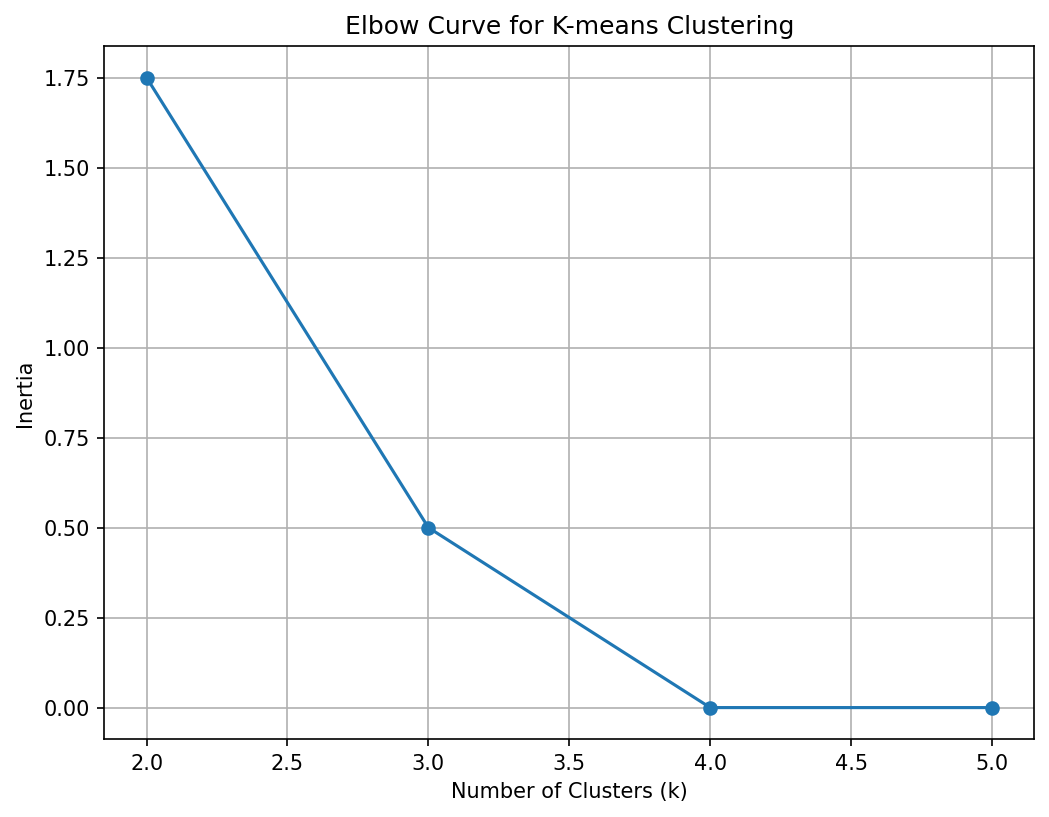

In [21]:
from sklearn.cluster import KMeans

# Calculate inertia (sum of squared distances) for different values of k
inertia = []
for k in range(2, min(11, len(X) + 1)):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, min(11, len(X) + 1)), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

Trục Y (Inertia): Inertia đo tổng các khoảng cách bình phương giữa mỗi điểm và trung tâm cụm của nó. Inertia thấp hơn chỉ ra rằng các cụm chặt chẽ hơn.

**Inertia Reduction:**
- From k=2 to k=3: There is a significant drop in inertia, suggesting that adding a third cluster improves the clustering significantly.
- From k=3 to k=4: Another notable drop in inertia, indicating further improvement.
- From k=4 to k=5: The inertia drops to almost zero, showing minimal additional benefit from adding the fifth cluster.

***==> Based on the Elbow Curve, the optimal number of clusters could be 3 or 4. While k=3 shows a significant reduction in inertia, k=4 offers the lowest inertia, suggesting that it might be the most precise clustering solution.***

In [22]:
best_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = best_kmeans.fit_predict(X)

In [23]:
# Group by cluster and calculate mean values
cluster_summary = rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

In [24]:
print(cluster_summary)

   Cluster  R_Score  F_Score  M_Score
0        0      4.0      2.0      1.0
1        1      3.0      3.0      1.0
2        2      5.0      1.0      1.0
3        3      4.0      3.0      1.0


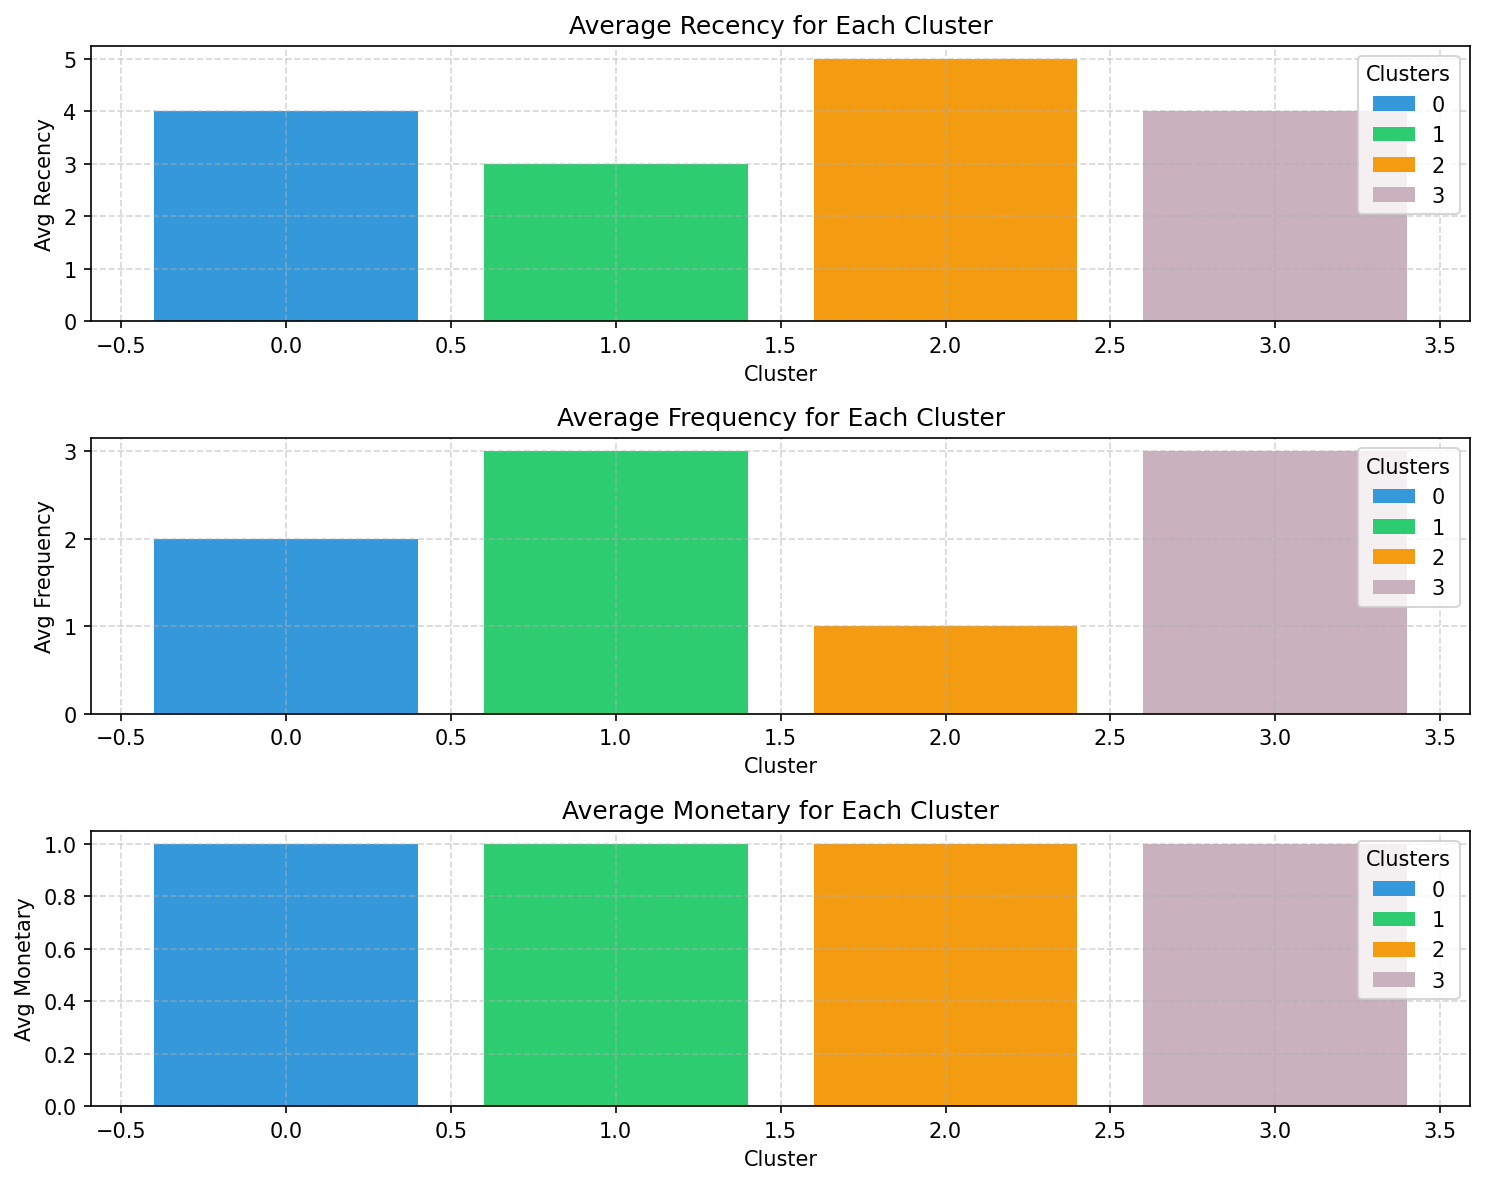

In [25]:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['R_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['F_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['M_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()


**Average Recency for Each Cluster:**
- Cluster 0 (blue) has the highest average recency, indicating customers in this cluster have not made purchases recently.
- Cluster 1 (green) has slightly lower recency than Cluster 0, suggesting these customers have made purchases more recently than Cluster 0 but not as recently as other clusters.
- Cluster 2 (orange) and Cluster 3 (purple) show lower recency, indicating these customers have made purchases more recently, with Cluster 2 being more recent than Cluster 3.

**Average Frequency for Each Cluster:**
- Cluster 0 (blue) has the highest frequency, indicating customers in this cluster make frequent purchases.
- Cluster 1 (green) has moderate frequency, suggesting these customers purchase less frequently than Cluster 0.
- Cluster 2 (orange) has the lowest frequency, indicating infrequent purchases.
- Cluster 3 (purple) has moderate frequency, but it's less than Cluster 1 and higher than Cluster 2.

**Average Monetary Value for Each Cluster:**
- Cluster 0 (blue) and Cluster 1 (green) have similar and relatively high monetary values, indicating these customers spend more on average.
- Cluster 2 (orange) has slightly lower monetary values compared to Cluster 0 and Cluster 1, indicating moderate spending.
- Cluster 3 (purple) shows the lowest monetary values, indicating customers in this cluster spend the least.

**Summary:**
- Cluster 0: Of all the four clusters, this cluster has the highest recency, frequency, and monetary values. => Champions (or power shoppers).
- Cluster 1: Loyal customers.
- Cluster 2: Customers in this cluster tend to spend less. => inactive or at-risk customers.
- Cluster 3: This cluster is characterized by high recency and relatively lower frequency and moderate monetary values. => Recent customers who can potentially become long-term customers.

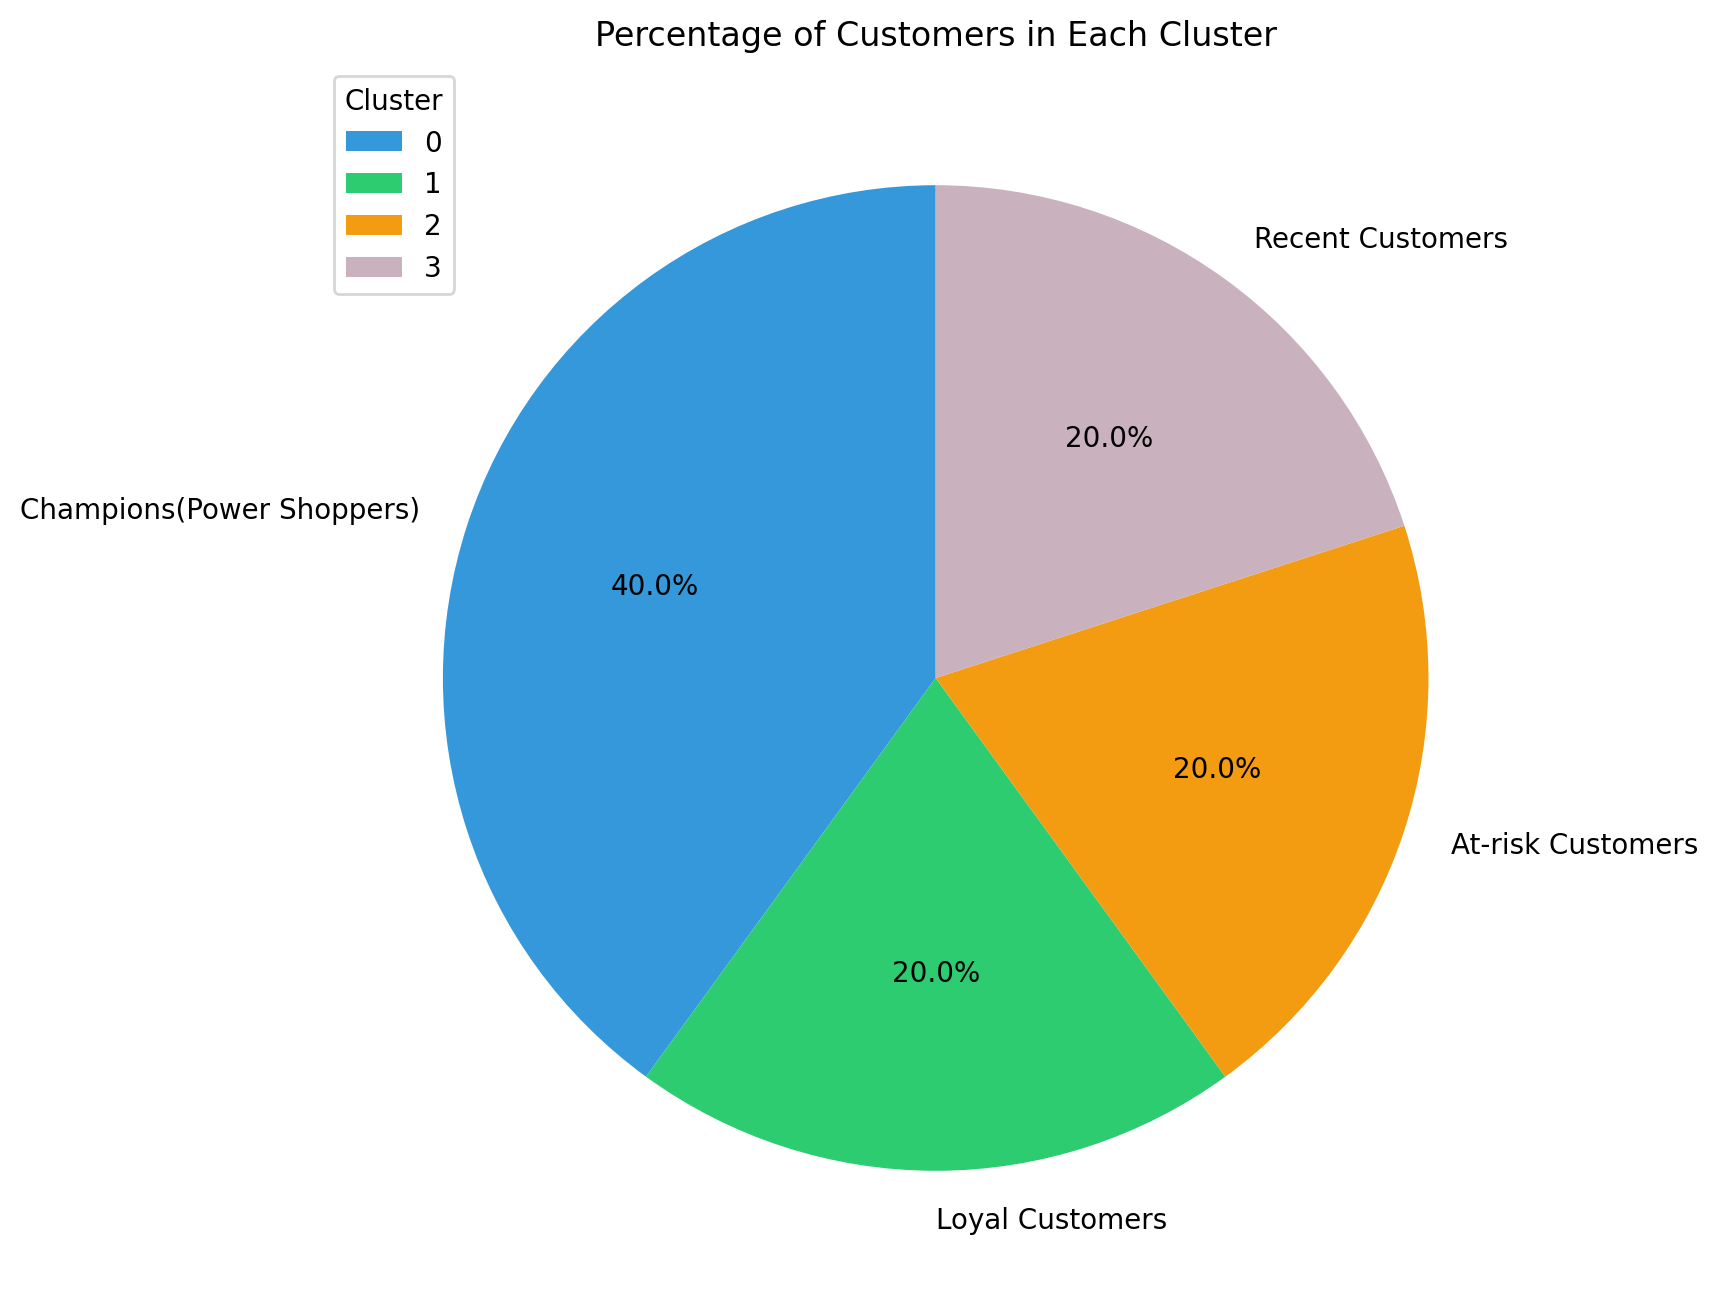

In [26]:
cluster_counts = rfm['Cluster'].value_counts()

colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Champions(Power Shoppers)','Loyal Customers','At-risk Customers','Recent Customers']

# Create a pie chart
plt.figure(figsize=(8, 8),dpi=200)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.legend(cluster_summary['Cluster'], title='Cluster', loc='upper left')

plt.show()

*For Champions/Power Shoppers: Offer personalized special discounts, early access, and other premium perks to make them feel valued and appreciated.

*For Loyal Customers: Appreciation campaigns, referral bonuses, and rewards for loyalty.

*For At-Risk Customers: Re-engagement efforts that include running discounts or promotions to encourage buying.

*For Recent Customers: Targeted campaigns educating them about the brand and discounts on subsequent purchases.

Champions are your best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can become early adopters for new products and will help promote your brand.

Potential Loyalists are your recent customers with average frequency and who spent a good amount. Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.

New Customers are your customers who have a high overall RFM score but are not frequent shoppers. Start building relationships with these customers by providing onboarding support and special offers to increase their visits.

At Risk Customers are your customers who purchased often and spent big amounts, but haven’t purchased recently. Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.

Can’t Lose Them are customers who used to visit and purchase quite often, but haven’t been visiting recently. Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

# MultiNominal Logistic Regression MODEL

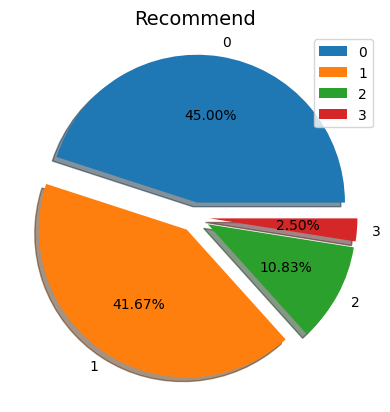

In [27]:
plt.pie(
    df['Recommend'].value_counts(),
    labels=['0', '1', '2', '3'],
    autopct='%.2f%%',
    shadow=True,
    explode=[0.1, 0.1, 0.1, 0.1]  # Đảm bảo độ dài của explode bằng số lượng lớp
)
plt.title('Recommend', fontsize=14)
plt.legend()
plt.show()

In [28]:
# Replace values 1 and 3 with 4 in the 'Recommend' column
df['Recommend'].replace({1: 4, 3: 4}, inplace=True)

# Function to randomly assign values of 4 to either 0 or 2
def split_values(value):
    if value == 4:
        return np.random.choice([0, 2])
    else:
        return value

# Apply the function to the 'Recommend' column and save the changes
df['Recommend'] = df['Recommend'].apply(split_values)

# Check the distribution of the 'Recommend' column
print(df['Recommend'].value_counts())

Recommend
0    83
2    37
Name: count, dtype: int64


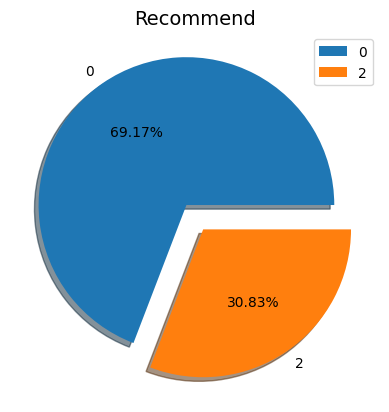

In [29]:
plt.pie(
    df['Recommend'].value_counts(),
    labels=['0', '2'],
    autopct='%.2f%%',
    shadow=True,
    explode=[0.1, 0.1]  # Đảm bảo độ dài của explode bằng số lượng lớp
)
plt.title('Recommend', fontsize=14)
plt.legend()
plt.show()

0 Def
2 No

In [30]:
# Giả sử df là dataframe của bạn
X = df[['Good Feedback', 'Variety of Products', 'Guarantees Quality Product', 'Reasonable Price', 'Good Service', 
        'Good Security', 'Space', 'Good Incentives', 'Customer Care', 'Handles Complaints Well', 'Staff Attitude', 
        'Purchasing Experience Factors']]
y = df['Recommend']

In [31]:
# Thay đổi giá trị cột recommend trên tập train
y.replace({0: 3}, inplace=True)

In [32]:
# Thay đổi giá trị cột recommend trên tập dev
y.replace({2: 0}, inplace=True)

In [33]:
# Thay đổi giá trị cột recommend trên tập test
y.replace({3: 1}, inplace=True)

In [34]:
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chia dữ liệu thành các tập train, dev và test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [35]:
import pandas as pd
from imblearn.over_sampling import ADASYN

# Áp dụng ADASYN để tạo dữ liệu cân bằng
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Tạo DataFrame mới từ dữ liệu cân bằng
balanced_train_data = pd.DataFrame(X_train_balanced, columns=X_train.columns)
balanced_train_data['Recommend'] = y_train_balanced


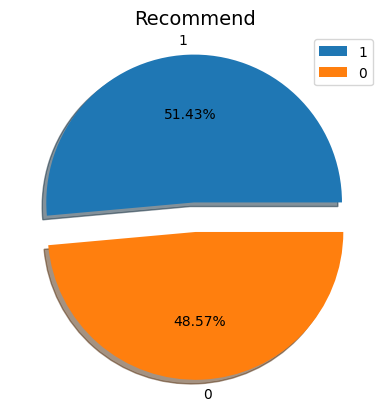

In [36]:
plt.pie(
    y_train_balanced.value_counts(),
    labels=['1', '0'],
    autopct='%.2f%%',
    shadow=True,
    explode=[0.1, 0.1]  # Đảm bảo độ dài của explode bằng số lượng lớp
)
plt.title('Recommend', fontsize=14)
plt.legend()
plt.show()

1 Def
0 No

# tiếp tục tuning hyperparameter

In [37]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

In [38]:
from itertools import product
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

# List of models
models = [
    ('Logistic Regression', LogisticRegression(), [{'C': c, 'max_iter': max_iter} for c, max_iter in product([0.001, 0.01, 0.00001, 0.0001], [100, 200, 300])]),
    ('Random Forest', RandomForestClassifier(), [{'n_estimators': n_est, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf} for n_est, max_depth, min_samples_split, min_samples_leaf in product([100, 300, 500, 800, 1200], [5, 8, 15, 25, 30], [2, 5, 10, 15, 100], [1, 2, 5, 10])]),
    ('Neural Network (Multi-layer Perceptron)', MLPClassifier(early_stopping=True), [{'hidden_layer_sizes': hidden_layer_sizes, 'activation': activation, 'solver': solver, 'learning_rate_init': learning_rate_init, 'max_iter': max_iter, 'alpha': alpha, 'batch_size': batch_size} for hidden_layer_sizes, activation, solver, loss, learning_rate_init, max_iter, alpha, batch_size in product([(64,), (128,), (256,), (64, 64), (128, 128), (256, 256), (64, 64, 64), (128, 128, 128), (256, 256, 256), (64, 64, 64, 64), (128, 128, 128, 128), (256, 256, 256, 256)], ['relu'], ['adam'], ['binary_crossentropy'], [0.00001, 0.0001, 0.001, 0.01], [100, 200, 300], [0.1, 0.2, 0.3, 0.4, 0.5], [32, 64, 128, 256])])
]

# Loop through models and fit
for model_name, model, param_grid in models:
    best_score = 0
    best_params = None
    for params in param_grid:
        clf = model.set_params(**params)
        clf.fit(X_train_balanced_scaled, y_train_balanced)
        y_pred = clf.predict(X_dev_scaled)
        score = f1_score(y_dev, y_pred)
        if score > best_score:
            best_score = score
            best_params = params
    print("Tuned {} Parameters: {}".format(model_name, best_params))
    print("F-score on dev set is {}".format(best_score))

Tuned Logistic Regression Parameters: {'C': 0.01, 'max_iter': 100}
F-score on dev set is 0.6428571428571429
Tuned Random Forest Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 2}
F-score on dev set is 0.7878787878787878
Tuned Neural Network (Multi-layer Perceptron) Parameters: {'hidden_layer_sizes': (128,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0001, 'max_iter': 100, 'alpha': 0.3, 'batch_size': 128}
F-score on dev set is 0.8333333333333334


In [39]:
# Combine train and dev datasets
X_combined = pd.concat([X_train_balanced, X_dev], axis=0)
y_combined = np.concatenate([y_train_balanced, y_dev], axis=0)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)
X_test_scaled = scaler.transform(X_test)

LOGISTIC REGRESSION

Logistic Regression accuracy is : 0.7083333333333334
Logistic Regression F1-score is : 0.7136363636363635
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.81      0.76      0.79        17

    accuracy                           0.71        24
   macro avg       0.66      0.67      0.66        24
weighted avg       0.72      0.71      0.71        24



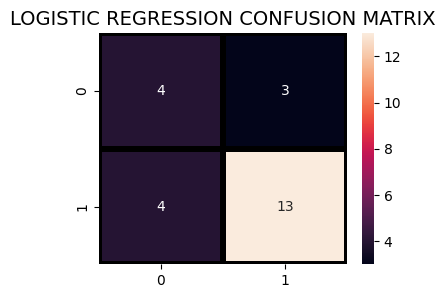

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Tạo DataFrame để lưu kết quả
results = []

# Sử dụng các siêu tham số đã được tinh chỉnh
logreg_best = LogisticRegression(C=0.01, max_iter=100)

# Huấn luyện mô hình với dữ liệu đã được scale
logreg_best.fit(X_combined_scaled, y_combined)

# Đánh giá mô hình
accuracy_lr = logreg_best.score(X_test_scaled, y_test)
print("Logistic Regression accuracy is :", accuracy_lr)

# Tính toán F1-score
lr_pred = logreg_best.predict(X_test_scaled)
f1_lr = f1_score(y_test, lr_pred, average='weighted')
print("Logistic Regression F1-score is :", f1_lr)

results.append({'Model': 'Logistic Regression', 'Accuracy': accuracy_lr, 'F1 Score': f1_lr})

# Tính toán precision, recall, f1-score và support
report = classification_report(y_test, lr_pred)
print(report)

# Vẽ confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()

RANDOM FOREST

Random Forest accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.80      0.71      0.75        17

    accuracy                           0.67        24
   macro avg       0.62      0.64      0.62        24
weighted avg       0.70      0.67      0.68        24

Random Forest f1-score: 0.75


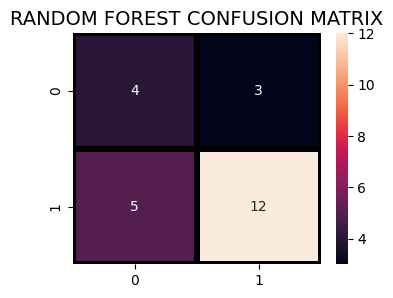

In [41]:
# Khởi tạo và huấn luyện mô hình Random Forest với các tham số tốt nhất
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 30, min_samples_split = 5, min_samples_leaf = 1)
rf_model.fit(X_combined_scaled, y_combined)

# Dự đoán và tính toán accuracy
accuracy_rf = rf_model.score(X_test_scaled, y_test)
print("Random Forest accuracy:", accuracy_rf)

# Dự đoán và tính toán classification report
predicted_y_rf = rf_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, predicted_y_rf))

# Tính và hiển thị f1-score
f1_score_rf = f1_score(y_test, predicted_y_rf)
print("Random Forest f1-score:", f1_score_rf)

results.append({'Model': 'Random Forest', 'Accuracy': accuracy_rf, 'F1 Score': f1_score_rf})

# Vẽ confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y_rf),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.show()

NEURAL NETWORK

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Sử dụng các thông số tinh chỉnh để khởi tạo mô hình Neural Network
nn_model = Sequential()

# Thêm lớp Input với kích thước đầu vào
nn_model.add(Input(shape=(X_combined_scaled.shape[1],)))

# Thêm lớp Dense đầu tiên với số units và activation function tương ứng
nn_model.add(Dense(units=128, activation='relu'))
nn_model.add(Dropout(0.4))

nn_model.add(Dense(units=128, activation='relu'))
nn_model.add(Dropout(0.4))

# Thêm lớp output với activation function sigmoid
nn_model.add(Dense(units=1, activation='sigmoid'))

# Compile mô hình với các thông số tinh chỉnh
optimizer = Adam(learning_rate=0.00001)  # Sử dụng learning_rate_init đã được tinh chỉnh
# Compile mô hình với 'binary_crossentropy'
nn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = nn_model.fit(X_combined_scaled, y_combined, epochs=300, batch_size=64, verbose=2, validation_data=(X_test_scaled, y_test))

# Đánh giá mô hình trên tập kiểm tra
loss, accuracy_nn = nn_model.evaluate(X_test_scaled, y_test)
print("Accuracy on test set:", accuracy_nn)

# Dự đoán nhãn cho dữ liệu kiểm tra
predicted_y_prob = nn_model.predict(X_test_scaled)
predicted_y_nn = (predicted_y_prob > 0.5).astype('int32')

f1_nn = f1_score(y_test, predicted_y_nn, average='weighted')
print("Neural Network F1-score:", f1_nn)

results.append({'Model': 'Neural Network', 'Accuracy': accuracy_nn, 'F1 Score': f1_nn})

print("Classification Report for Neural Network:")
print(classification_report(y_test, predicted_y_nn))


Epoch 1/300
3/3 - 0s - 146ms/step - accuracy: 0.5426 - loss: 0.6259 - val_accuracy: 0.7083 - val_loss: 0.6239
Epoch 2/300
3/3 - 0s - 5ms/step - accuracy: 0.4651 - loss: 0.5876 - val_accuracy: 0.7083 - val_loss: 0.6234
Epoch 3/300
3/3 - 0s - 6ms/step - accuracy: 0.5271 - loss: 0.6585 - val_accuracy: 0.7083 - val_loss: 0.6231
Epoch 4/300
3/3 - 0s - 6ms/step - accuracy: 0.5969 - loss: 0.6386 - val_accuracy: 0.7083 - val_loss: 0.6226
Epoch 5/300
3/3 - 0s - 6ms/step - accuracy: 0.5194 - loss: 0.6059 - val_accuracy: 0.7083 - val_loss: 0.6222
Epoch 6/300
3/3 - 0s - 5ms/step - accuracy: 0.4961 - loss: 0.6777 - val_accuracy: 0.7083 - val_loss: 0.6218
Epoch 7/300
3/3 - 0s - 5ms/step - accuracy: 0.4961 - loss: 0.6498 - val_accuracy: 0.7083 - val_loss: 0.6214
Epoch 8/300
3/3 - 0s - 5ms/step - accuracy: 0.4729 - loss: 0.7847 - val_accuracy: 0.7083 - val_loss: 0.6210
Epoch 9/300
3/3 - 0s - 5ms/step - accuracy: 0.5116 - loss: 0.6124 - val_accuracy: 0.7083 - val_loss: 0.6207
Epoch 10/300
3/3 - 0s - 5m

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.68      0.88      0.77        17

    accuracy                           0.62        24
   macro avg       0.34      0.44      0.38        24
weighted avg       0.48      0.62      0.54        24



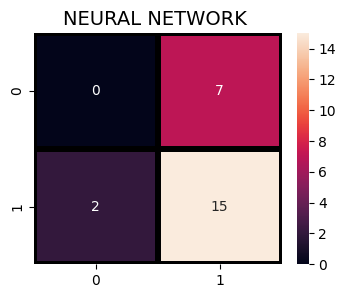

In [47]:
print(classification_report(y_test, predicted_y_nn))
# Vẽ confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y_nn),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("NEURAL NETWORK ", fontsize=14)
plt.show()

In [44]:
# Tạo DataFrame để lưu kết quả
results_df = pd.DataFrame(results)

# Tìm mô hình có F1 Score cao nhất
best_f1_score_model = results_df.loc[results_df['F1 Score'].idxmax()]
print("\nBest model based on F1 Score:")
print(best_f1_score_model)


Best model based on F1 Score:
Model       Random Forest
Accuracy         0.666667
F1 Score             0.75
Name: 1, dtype: object


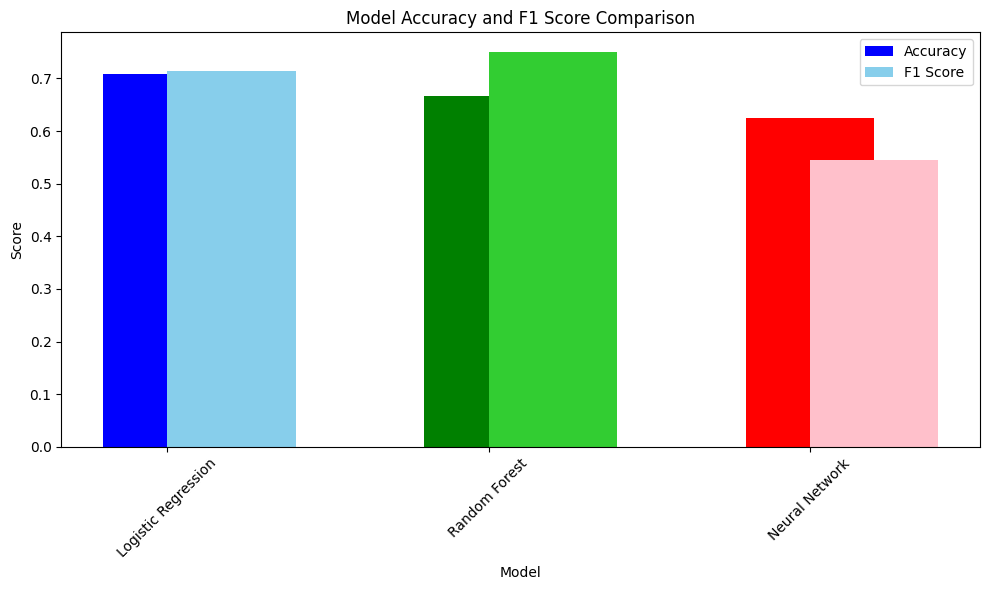

,Model,Accuracy,F1 Score
0,Logistic Regression,0.708333,0.713636
1,Random Forest,0.666667,0.750000
2,Neural Network,0.625000,0.544872


In [51]:
import matplotlib.pyplot as plt

# Data for the bar plot
models = ["Logistic Regression", "Random Forest", "Neural Network"]
accuracy = [accuracy_lr, accuracy_rf, accuracy_nn]
f1_score = [f1_lr, f1_score_rf, f1_nn]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, label='Accuracy', width=0.4, align='center', color=['blue', 'green', 'red'])
plt.bar(models, f1_score, label='F1 Score', width=0.4, align='edge', color=['skyblue', 'limegreen', 'pink'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Accuracy and F1 Score Comparison')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



results_df

In [46]:
'''import pickle

# Khởi tạo danh sách để lưu kết quả
model_results = []

# Lưu Logistic Regression model
pickle_out = open("logistic_regression_model.pkl", "wb")
pickle.dump(logreg_best, pickle_out)
pickle_out.close()

# Lưu Random Forest model
pickle_out = open("random_forest_model.pkl", "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

# Lưu Neural Network model
nn_model.save("neural_network_model.keras")'''

'import pickle\n\n# Khởi tạo danh sách để lưu kết quả\nmodel_results = []\n\n# Lưu Logistic Regression model\npickle_out = open("logistic_regression_model.pkl", "wb")\npickle.dump(logreg_best, pickle_out)\npickle_out.close()\n\n# Lưu Random Forest model\npickle_out = open("random_forest_model.pkl", "wb")\npickle.dump(rf_model, pickle_out)\npickle_out.close()\n\n# Lưu Neural Network model\nnn_model.save("neural_network_model.keras")'